# 4. DEVEOP
In this notebook we will:
>**1) We will create a baseline model**<br>
>**2) Preprocess Data(if needed)**<br>
>**3) Tune the model for optimized results**<br>

In [26]:
#import intial packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#set the root path

cd C:\Users\Jo's\Documents\DSDJ\Portfollio.mod4.5\S1\

C:\Users\Jo's\Documents\DSDJ\Portfollio.mod4.5\S1


In [8]:
### Load data

train_final=pd.read_csv("data/final_data/cleaned_data.csv")

### 4.1 ------BaseLine Model------

#### 4.2.1 -------- Import packages ---------

In [7]:
# import model & evaluation packages

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import statsmodels.api as sm

#### 4.2.2  ------- Prepare Data for model --------

In [9]:
train_final.head()

jobType       degree      major industry  yearsExperience  \
0             CFO      MASTERS       MATH   HEALTH               10   
1             CEO  HIGH_SCHOOL       NONE      WEB                3   
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH               10   
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO                8   
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE                8   

   milesFromMetropolis  salary Attended_College  cat_feat_mean  exp_dist_mean  \
0                   83     130              Yes     141.246753      98.397741   
1                   73     101               No     140.051566      92.133040   
2                   38     137              Yes     133.640097     115.555975   
3                   17     142              Yes     118.915865     123.099326   
4                   16     163              Yes     142.290323     123.099326   

   dist_job_mean  
0     124.448359  
1     128.446613  
2     125.984643  
3     134.086609  
4     134.086609

In [10]:
#separting the target from the feature df
Y=train_final.pop("salary")

#one hot encoding the categorical features
X=pd.get_dummies(train_final)

In [11]:
X.head()

yearsExperience  milesFromMetropolis  cat_feat_mean  exp_dist_mean  \
0               10                   83     141.246753      98.397741   
1                3                   73     140.051566      92.133040   
2               10                   38     133.640097     115.555975   
3                8                   17     118.915865     123.099326   
4                8                   16     142.290323     123.099326   

   dist_job_mean  jobType_CEO  jobType_CFO  jobType_CTO  jobType_JANITOR  \
0     124.448359            0            1            0                0   
1     128.446613            1            0            0                0   
2     125.984643            0            0            0                0   
3     134.086609            0            0            0                0   
4     134.086609            0            0            0                0   

   jobType_JUNIOR  ...  major_PHYSICS  industry_AUTO  industry_EDUCATION  \
0               0  ...              0              0                   0   
1               0  ...              0              0                   0   
2               0  ...              1              0                   0   
3               0  ...              0              1                   0   
4               0  ...              1              0                   0   

   industry_FINANCE  industry_HEALTH  industry_OIL  industry_SERVICE  \
0                 0                1             0                 0   
1                 0                0             0                 0   
2                 0                1             0                 0   
3                 0                0             0                 0   
4                 1                0             0                 0   

   industry_WEB  Attended_College_No  Attended_College_Yes  
0             0                    0                     1  
1             1                    1                     0  
2             0                    0                     1  
3             0                    0                     1  
4             0                    0                     1  

[5 rows x 36 columns]

In [12]:
Y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [13]:
def split(X,Y):
    return(train_test_split(X,Y, test_size = 0.2, random_state = 40))

In [14]:
xtrain, xtest, ytrain, ytest=split(X,Y)

### 4.2.3 -------- Linear Regression ---------

>**We will be using a simple regression model like Linear model as a baseline model,so that we can understand the trends better and further we will see how feature engineering works on the model and learn more about the penalities and outliers.**

In [24]:
def Linear_Model(lr,X,Y,kind):
    print("Validating the model on "+kind+".....")
    
    y_pre=lr.predict(X)
    
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.regplot(x=Y, y=y_pre,line_kws={"color":"r"})
    plt.xlabel("Actual Salary")
    plt.ylabel("Predicted Salary")
    
    plt.subplot(1,2,2)
    sns.distplot(Y - y_pre,bins=20)
    plt.title("Error Plot")
    plt.show
    
    #5 Fold Cross Validation
    cv_score = cross_val_score(lr, X, Y, cv=5)
    print("\n",cv_score,"\n")
    print("\n  5-Fold Cross Validation on "+kind, (np.mean(cv_score)))
    
    # MSE - 
    print('\n MSE on '+kind, mean_squared_error(Y, y_pre))
    
    if kind=="Train Data":
        X = sm.add_constant(X)
        lm = sm.OLS(Y,X).fit()
        print(lm.summary())
    
    #orginal and predicted df(out of scope for now)
    #pre_df=pd.DataFrame((y_pre),columns=['Prediction'],index=Y.index)
    #pre_df["Salary"]=Y
    #return(pre_df)
    return(0)

In [21]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 4.2.3.1 ------ Validating Train Set --------

Validating the model on Train Data.....

 [0.75896332 0.75759988 0.75895026 0.75742102 0.75838018] 


  5-Fold Cross Validation on Train Data 0.7582629329669285

 MSE on Train Data 361.90141908482303


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 8.365e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:10:31   Log-Likelihood:            -3.4917e+06
No. Observations:              799996   AIC:                         6.983e+06
Df Residuals:                  799965   BIC:                         6.984e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

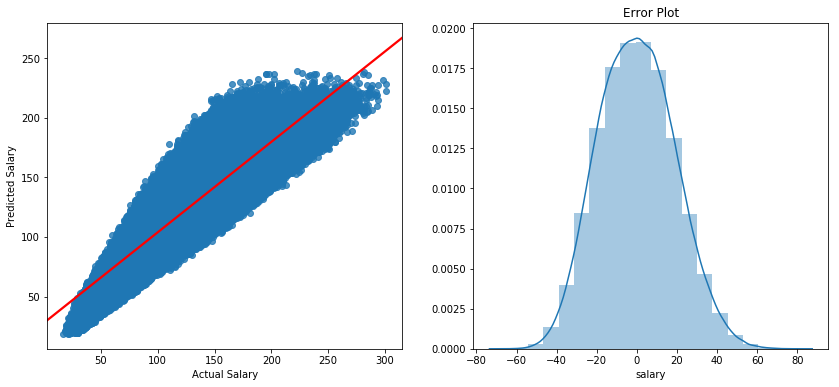

In [27]:
new_df_tr=Linear_Model(lr,xtrain,ytrain,"Train Data")

#### 4.3.2 ------ Validating Test Set ------

Validating the model on Test Data.....

 [0.76067646 0.7603086  0.76035223 0.76015758 0.75750467] 


  5-Fold Cross Validation on Test Data 0.7597999085125889

 MSE on Test Data 361.6692720899025


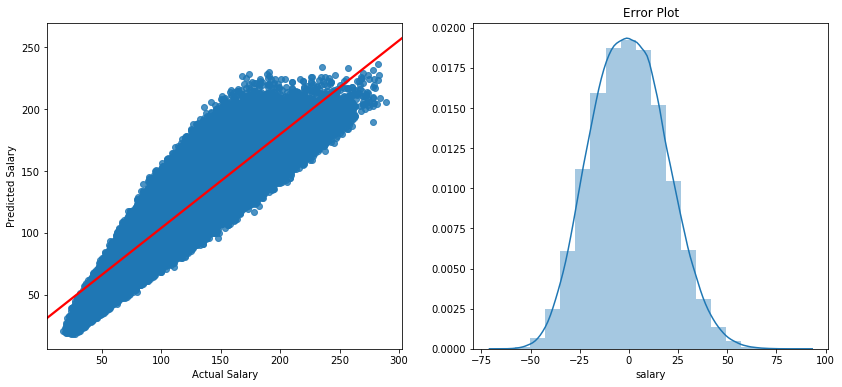

In [28]:
new_df_ts=Linear_Model(lr,xtest,ytest,"Test Data")

#### 4.2.3.4 ------------ Polynomial Features --------

>Let's see how the model fetches signal with more added features.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly_trans = PolynomialFeatures(degree=2,interaction_only=True)
xtr_poly = poly_trans.fit_transform(xtrain)
xts_poly = poly_trans.fit_transform(xtest)

In [30]:
xtr_poly.shape

(799996, 667)

#### 4.2.3.4.1 ------ Train data ----------

Validating the model on Train Data Polynomial Transformed.....

 [0.76424596 0.76287929 0.76417422 0.76296608 0.76382422] 


  5-Fold Cross Validation on Train Data Polynomial Transformed 0.76361795474682

 MSE on Train Data Polynomial Transformed 353.57873321607775


0

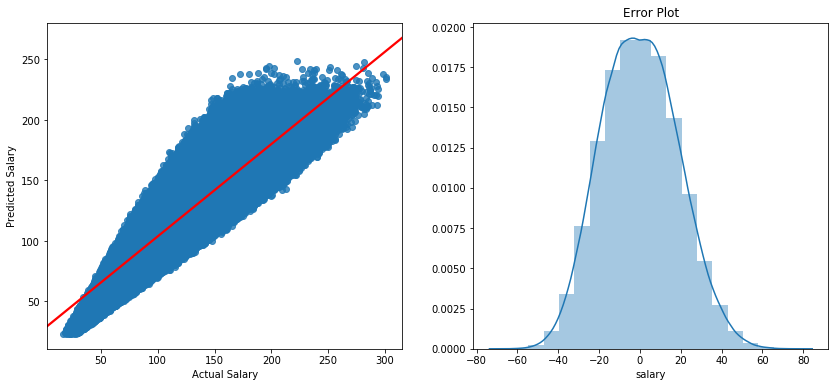

In [31]:
poly_lr = LinearRegression()
poly_lr.fit(xtr_poly, ytrain)
#p1=poly_lr
Linear_Model(poly_lr,xtr_poly,ytrain,"Train Data Polynomial Transformed")

#### 4.2.3.3.2 -------------- Test Data ----------

Validating the model on Test Data Polynomial Transformed.....

 [0.76609145 0.76532767 0.76509167 0.76520364 0.76323781] 


  5-Fold Cross Validation on Test Data Polynomial Transformed 0.7649904482951874

 MSE on Test Data Polynomial Transformed 353.2073512937853


0

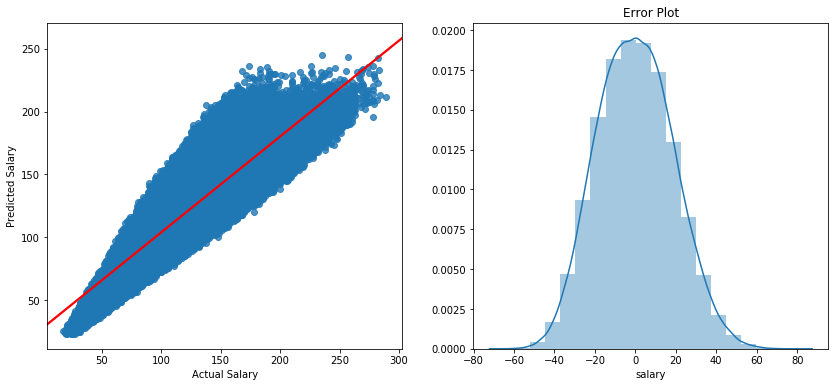

In [32]:
Linear_Model(poly_lr,xts_poly,ytest,"Test Data Polynomial Transformed")

### 4.2.4 ------------- Random Forest -------------

>Now lets see if the prediction improves with a tree model such as Random Forest.I will be hand tuning the hyperparmetering and will use grid search to fine tune  it.

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
rf_predict=rf.predict(xtrain)
Mse_Err=mean_squared_error(ytrain,rf_predict)
#print("The OOB Score is: " + str(rf.oob_score_))
print("MSE score is:"+str(Mse_Err))
rf_predict=rf.predict(xtest)
Mse_Err=mean_squared_error(ytest,rf_predict)
print("MSE score is:"+str(Mse_Err))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE score is:125.94325384517083
MSE score is:459.14338797311405


In [34]:
def plot_hyper(hyper_list,mse_err_tr,mse_err_ts,hyper_kind):
    plt.plot(hyper_list, mse_err_tr, label='Train Set')
    plt.plot(hyper_list, mse_err_ts, label='Test Set')
    plt.xlabel(hyper_kind)
    plt.ylabel('MSE Score')
    plt.title('Train VS Test Scores')
    plt.legend(loc="center right")
    plt.show()
    print("Minimun MSE for "+hyper_kind+" is: ",hyper_list[mse_err_ts.index(min(mse_err_ts))])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :1
MSE score on train: 965.4942937486786
MSE score on test: 970.4113690324685


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :5
MSE score on train: 403.4853630780147
MSE score on test: 403.421461631402


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :10
MSE score on train: 356.2883102460349
MSE score on test: 360.9295233787715


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :11
MSE score on train: 351.0552380995531
MSE score on test: 359.5616231744691


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :12
MSE score on train: 344.12351190408987
MSE score on test: 359.37909061112396


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :13
MSE score on train: 334.8627163976957
MSE score on test: 360.5621275956407


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :14
MSE score on train: 322.71719210714167
MSE score on test: 362.85649129375025


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :15
MSE score on train: 307.4242604613055
MSE score on test: 366.4743997078245


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :16
MSE score on train: 289.56582812011914
MSE score on test: 371.3308277491505


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :17
MSE score on train: 269.7379107811644
MSE score on test: 377.49805299442266


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :20
MSE score on train: 209.9816356655064
MSE score on test: 401.4900541748331


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Maximum depth  :25
MSE score on train: 147.17253649834345
MSE score on test: 438.29294427985


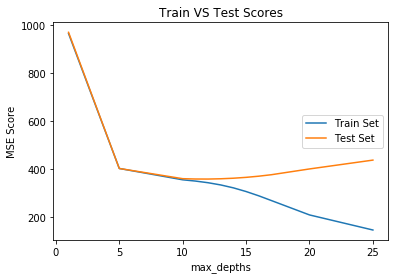

Minimun MSE for max_depths is:  12


In [35]:
# Values for max_depth
max_depths = [1, 5, 10, 11, 12, 13, 14, 15, 16, 17, 20, 25]
mse_err_tr=[]
mse_err_ts=[]

for md in max_depths:
    rf=RandomForestRegressor(max_depth=md,random_state=44,n_jobs=-1)
    rf.fit(xtrain,ytrain)
    print("Maximum depth  :"+str(md))
    
    #on train data
    rf_predict=rf.predict(xtrain)
    Err=mean_squared_error(ytrain,rf_predict)
    print("MSE score on train: "+str(Err))
    mse_err_tr.append(Err)
    
    #on test data
    rf_predict=rf.predict(xtest)
    Err=mean_squared_error(ytest,rf_predict)
    print("MSE score on test: "+str(Err))
    mse_err_ts.append(Err)
    
    
plot_hyper(max_depths,mse_err_tr,mse_err_ts,"max_depths")    

#### OBSERVATION:
>Let's select the max_depth with min. MSE ,ie,12 for now and see how far we can push the score.We will deal with overfitting later by reducing the depth if necessary.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :1
MSE score on train: 344.12351190408987
MSE score on test: 359.37909061112396


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :5
MSE score on train: 344.69721049221135
MSE score on test: 359.3268831355193


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :10
MSE score on train: 345.419051523127
MSE score on test: 359.1848777242151


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :20
MSE score on train: 346.63406069416465
MSE score on test: 358.92578933697035


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :30
MSE score on train: 347.55026490997443
MSE score on test: 358.6544394891584


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :40
MSE score on train: 348.3162868989524
MSE score on test: 358.53418419121306


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :50
MSE score on train: 348.9524880376737
MSE score on test: 358.4116084411428


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :70
MSE score on train: 350.00116479467533
MSE score on test: 358.20122298060636


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :90
MSE score on train: 350.88986489903743
MSE score on test: 358.1549442034901


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :100
MSE score on train: 351.29550599627055
MSE score on test: 358.1417592521983


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :120
MSE score on train: 351.98416028127383
MSE score on test: 358.1238578047787


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


min_samples_leaf  :140
MSE score on train: 352.5677866822585
MSE score on test: 358.2328355934376


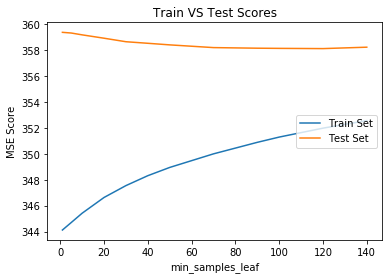

Minimun MSE for min_samples_leaf is:  120


In [36]:
# Values for min_samples_leaf 
min_samples_leaf = [1,5, 10, 20,30,40,50,70,90,100,120,140]
mse_err_tr=[]
mse_err_ts=[]

for msl in min_samples_leaf:
    rf=RandomForestRegressor(max_depth=12,min_samples_leaf=msl,random_state=44,n_jobs=-1)
    rf.fit(xtrain,ytrain)
    print("min_samples_leaf  :"+str(msl))
    
    #on train data
    rf_predict=rf.predict(xtrain)
    Err=mean_squared_error(ytrain,rf_predict)
    print("MSE score on train: "+str(Err))
    mse_err_tr.append(Err)
    
    #on test data
    rf_predict=rf.predict(xtest)
    Err=mean_squared_error(ytest,rf_predict)
    print("MSE score on test: "+str(Err))
    mse_err_ts.append(Err)
    
plot_hyper(min_samples_leaf,mse_err_tr,mse_err_ts,"min_samples_leaf")

#### Observation:
>1) We can see a slight variation in min_samples_leaf between 20-30.Let's keep that for final optimazation.

>2) Increasing the leaf number ,increase the complexity odf the model,but as far as we have seen,high values of leaf number reduces overfitting and increses the score slightly.This can maybe balance between overfitting cause by max_depth.Foe now lets make the score as the max priority. Therefore lets chosse 120 for now,and optimize it again if needed .

In [37]:
max_features = ['auto', 'sqrt','log2', None, .1, .2, .3, .4, .5, .6, .7, .8, .9]
mse_err_tr=[]
mse_err_ts=[]
for mf in max_features:
    rf=RandomForestRegressor(max_depth=12,min_samples_leaf=120,max_features=mf,random_state=44,n_jobs=-1)
    rf.fit(xtrain,ytrain)
    print("max_features  :"+str(mf))
    
    #on train data
    rf_predict=rf.predict(xtrain)
    Err=mean_squared_error(ytrain,rf_predict)
    print("MSE score on train: "+str(Err))
    mse_err_tr.append(Err)
    
    #on test data
    rf_predict=rf.predict(xtest)
    Err=mean_squared_error(ytest,rf_predict)
    print("MSE score on test: "+str(Err))
    mse_err_ts.append(Err)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :auto
MSE score on train: 351.9841602812738
MSE score on test: 358.1238578047787


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :sqrt
MSE score on train: 371.21466382963933
MSE score on test: 374.6563290337894


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :log2
MSE score on train: 381.6086389655501
MSE score on test: 385.6344050538894


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :None
MSE score on train: 351.9841602812738
MSE score on test: 358.1238578047787


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.1
MSE score on train: 403.19066981677344
MSE score on test: 406.1990544753779


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.2
MSE score on train: 368.40037445463366
MSE score on test: 372.5245505553056


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.3
MSE score on train: 359.0313029855981
MSE score on test: 363.3527947901601


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.4
MSE score on train: 355.2571113683278
MSE score on test: 360.3206392430901


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.5
MSE score on train: 352.6869964881469
MSE score on test: 358.21775863689896


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.6
MSE score on train: 352.1756970156675
MSE score on test: 358.09215203490567


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.7
MSE score on train: 351.78186021293595
MSE score on test: 357.5548326544036


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.8
MSE score on train: 352.04767212480374
MSE score on test: 358.0342461063492


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


max_features  :0.9
MSE score on train: 352.08715911920166
MSE score on test: 358.15660189826207


Text(0.5, 1.0, 'Maximum Features Allowed Accuracies')

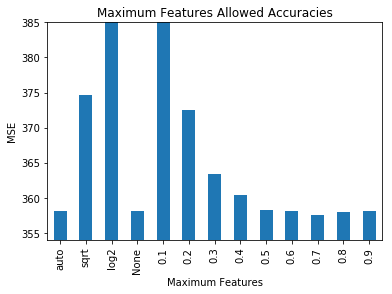

In [38]:
max_features_result = pd.Series(mse_err_ts, index=max_features)

ax = max_features_result.plot.bar(ylim=(354, 385))
ax.set_xlabel('Maximum Features')
ax.set_ylabel('MSE')
ax.set_title('Maximum Features Allowed Accuracies')

0.7 prvides the best score.

max_features  :5
MSE score on train: 350.13670222920615
MSE score on test: 358.94544833123473
max_features  :10
MSE score on train: 349.3384199985342
MSE score on test: 357.9467701548522
max_features  :15
MSE score on train: 349.1298437687577
MSE score on test: 357.6780304517239
max_features  :25
MSE score on train: 348.70614472779494
MSE score on test: 357.34970694741355
max_features  :35
MSE score on train: 348.60171949882425
MSE score on test: 357.24642288231894
max_features  :50
MSE score on train: 348.50888409686564
MSE score on test: 357.16334734031176
max_features  :75
MSE score on train: 348.33222798705964
MSE score on test: 357.04717149143073


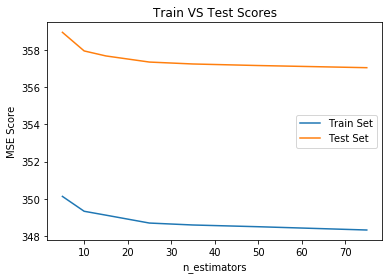

Minimun MSE for n_estimators is:  75


In [39]:
n_estimators = [5, 10, 15, 25, 35, 50, 75]
mse_err_tr=[]
mse_err_ts=[]
for ne in n_estimators:
    rf=RandomForestRegressor(max_depth=12,min_samples_leaf=50,n_estimators=ne,max_features=0.7,random_state=44,n_jobs=-1)
    rf.fit(xtrain,ytrain)
    print("max_features  :"+str(ne))
    
    #on train data
    rf_predict=rf.predict(xtrain)
    Err=mean_squared_error(ytrain,rf_predict)
    print("MSE score on train: "+str(Err))
    mse_err_tr.append(Err)
    
    #on test data
    rf_predict=rf.predict(xtest)
    Err=mean_squared_error(ytest,rf_predict)
    print("MSE score on test: "+str(Err))
    mse_err_ts.append(Err)
    
plot_hyper(n_estimators,mse_err_tr,mse_err_ts,"n_estimators")

#### Observation:
>As the estimator value increases the accuracy also increases,but the rate of increase decreases.Here we have find a value which balances between time and rate increase. 

#### NOTES: 
>1) Even if we give a large value for nestimator,it is not feasiable to use random forest to get a better score than linear model with regards to the time.<br>

>2) So far,the score did't improve as expected,Anyway lets fine tune the random forest model for the sake of completeness.<br>

>3) I have set the n_estimator value for grid search as 5 for the sake of fast proccessing and for fine tuning other parameters.

In [40]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
parameters = [{"max_depth":[11,12,13],"min_samples_leaf":[110,120,130],"max_features":[0.625,0.65,0.675],"n_estimators":[5]}]
Grid = GridSearchCV(rf, parameters, cv = 3)
Grid.fit(xtrain, ytrain)
bestrf = Grid.best_estimator_

In [41]:
bestrf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features=0.675, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=110, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
pred=Grid.predict(xtest)
err = mean_squared_error(pred, ytest)

print("Random Forest tuned MSE: ",err)

Random Forest tuned MSE:  358.5380662034462


yearsExperience           0.043022
milesFromMetropolis       0.013818
cat_feat_mean             0.557398
exp_dist_mean             0.239262
dist_job_mean             0.105282
jobType_CEO               0.000270
jobType_CFO               0.000099
jobType_CTO               0.000090
jobType_JANITOR           0.024801
jobType_JUNIOR            0.000457
jobType_MANAGER           0.000092
jobType_SENIOR            0.000067
jobType_VICE_PRESIDENT    0.000136
degree_BACHELORS          0.000123
degree_DOCTORAL           0.000128
degree_HIGH_SCHOOL        0.000103
degree_MASTERS            0.000126
degree_NONE               0.000133
major_BIOLOGY             0.000056
major_BUSINESS            0.000103
major_CHEMISTRY           0.000052
major_COMPSCI             0.000056
major_ENGINEERING         0.000138
major_LITERATURE          0.000053
major_MATH                0.000065
major_NONE                0.001377
major_PHYSICS             0.000053
industry_AUTO             0.000191
industry_EDUCATION  

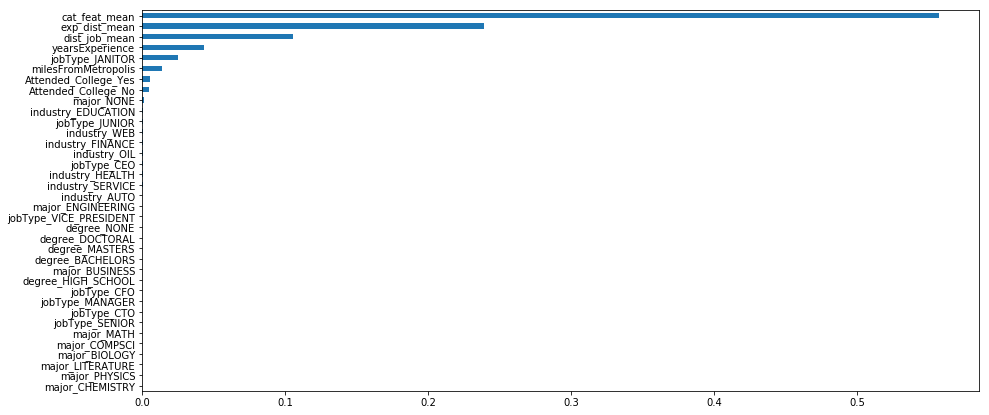

In [43]:
rf = RandomForestRegressor(max_depth=12,
           max_features=0.65,min_samples_leaf=25,n_estimators=500, n_jobs=-1,random_state=1)#estimator value decresed for faster computation 
 
rf.fit(xtrain,ytrain)

feature_importances = pd.Series(rf.feature_importances_, index=xtrain.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(15,7))

#### OBSERVATION:
>We can see that our engineered features does most of the prediction.
As far as we have seen Linear regression with polynomial tranformation provides the best result **MSE 353**.

### NOTES:
>The values of max_depth and n_estimators are conditional on basis of overfitting and test score accuracy.We have set the best value for max_depth for max. score by trading of overfitting,but still doesn't provide the best results,therefore there is no point in optimizing random forest any further.

## CONCLUSION

>  The Linear regression model with ***Polynomial Transformation*** provides the best result of **MSE 353**.<br>
>  Random Forest model also provide satisfatory score of **MSE 358.5**.

#### Findings

>- Overall the main predictor feature is "jobType".All other feature is heavly dependent on jobType directly or indirectly.We used the dependence of jobType to feature engineer certain features which could provide huge impact in the score. 

>- "YearsofExperience" was seen to a good predictor logically,but turns out it has high dependence of jobType,ie, expencience for that particular role.If we had more information on the overall experience in that particular comapany or field ,I coud boost up the prediction.Here "YearsofExperience" could mislead between an amateur CEO of a startup company and a newly posted CEO of a huge company. 
                                                                                                                               
>- Even though "JobType" is a good predictor,there is a huge varience in salary for each role.This could have be avoided if we have more information of the company,like how big a company is.Here the "companyId" provide almost zero relevance and doesn't provide any pattern.If there was any kind pattern for "companyId" it would have provided a huge impact in the score.If could know how big a company is, we could cut the variance in salary each "jobType".According to the data we might be treating the CEOs of huge companies like facebook to a startup company's CEO same and predicting the salary.This causes the huge varience in jobType.

#### Results

>- Here in this model,we squeeze out almost every pattern to predict the salary without much standard deviation in error.I was able to get a ***MSE score of 353 at 76% accuracy.***

>- ***Linear regression*** does the job after ***second order polynomial transformation***,where it could capture more patterns using more features.

>- Also I was also able to pickup several patterns in determining several feature and further in predicting salary.

#### Out of scope for this project

>we could use the salary feature and predictions from the model to calculate the errors and thereby classify the outliers.The outliers can be huge company employees,startup company employees,contract based employees etc.And we could also make models specfic for each categories for employee to predict their salaries which could be of less standard deviation of errors from this data.